# Import all libraries

In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats

# Import data

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df['dteday']=pd.to_datetime(df.dteday)

In [6]:
df['season']=df.season.astype('category')
df['yr']=df.yr.astype('category')
df['mnth']=df.mnth.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weathersit']=df.weathersit.astype('category')

In [8]:
df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Exploratory data analysis

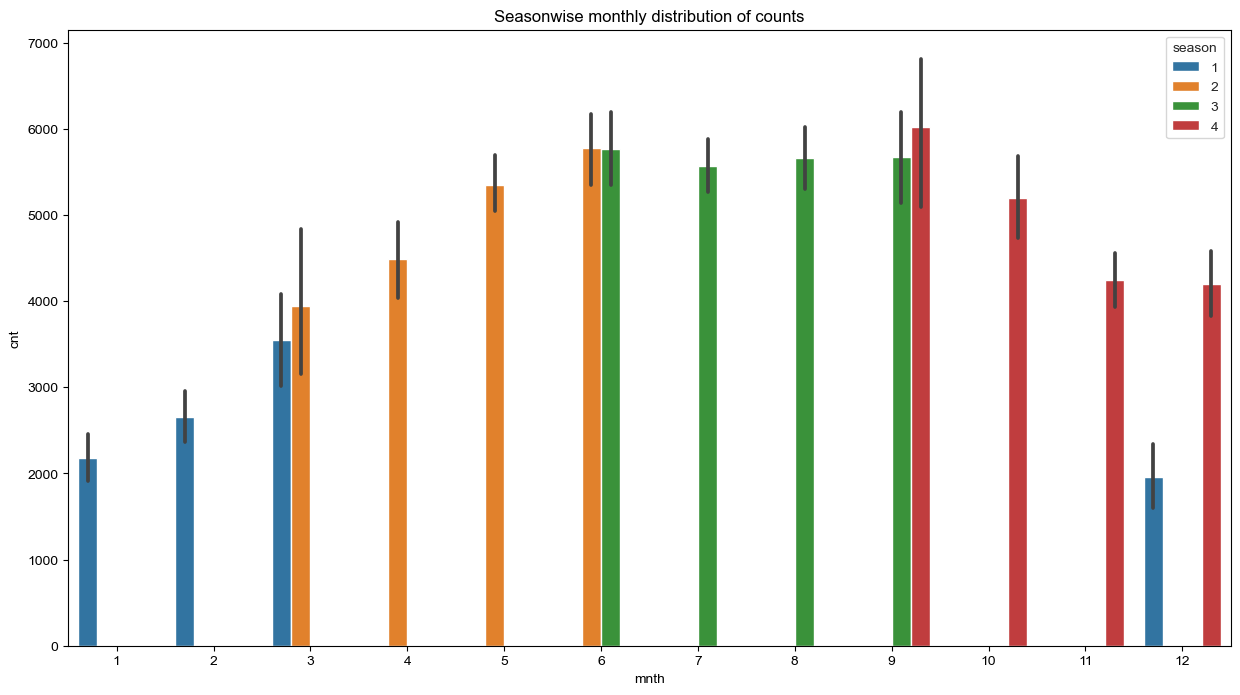

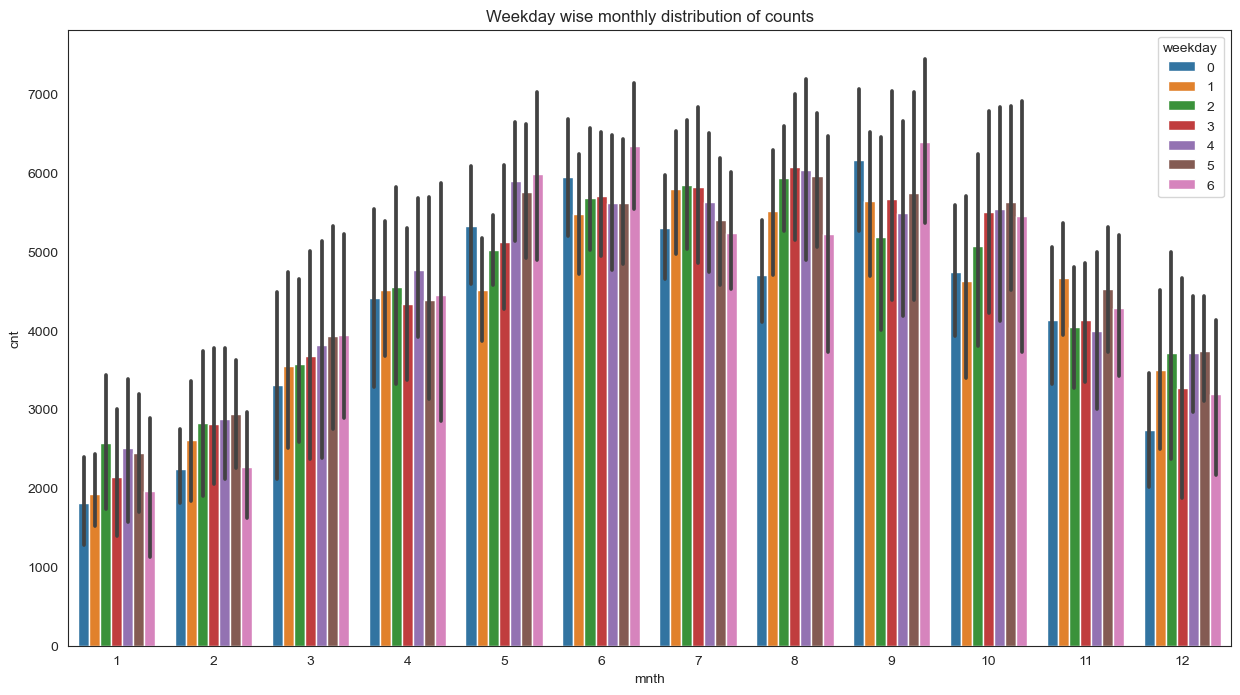

In [8]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

From the above plots, we can observed that increasing the bike rental count in spring and summer season and then decreasing the bike rental count in fall and winter season. Here,

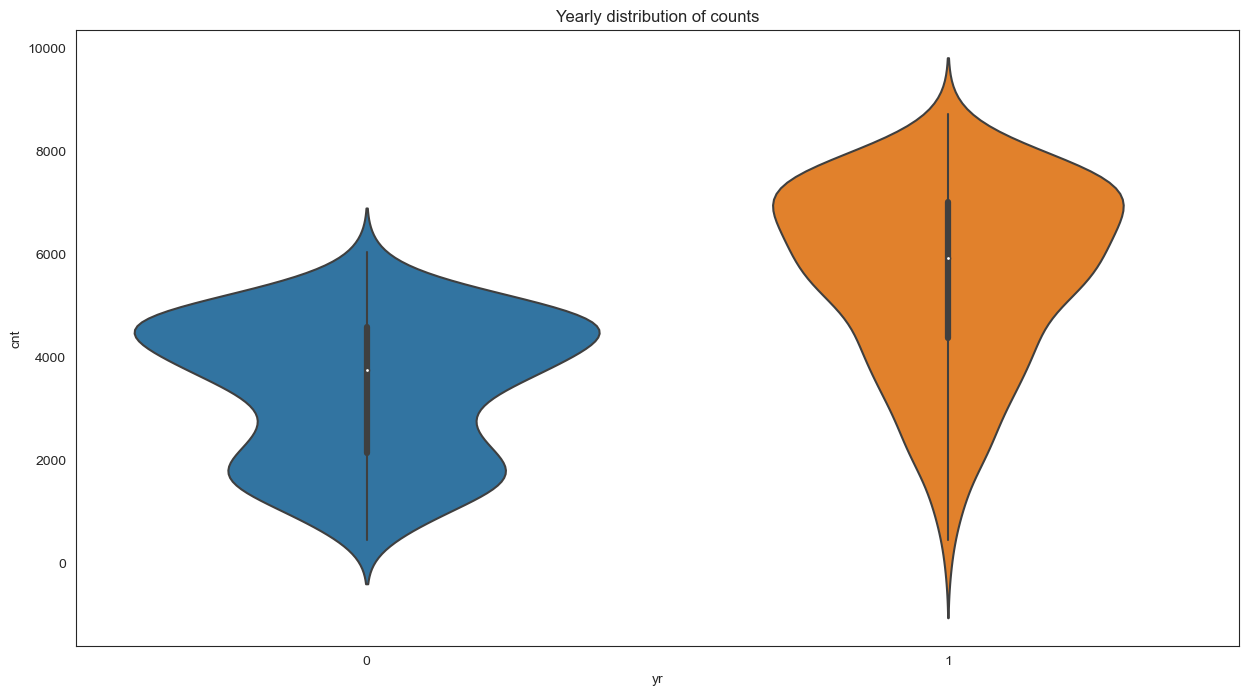

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='yr',y='cnt',data=df[['yr','cnt']])
ax.set_title('Yearly distribution of counts')
plt.show()

From the violin plot, we can observed that the bike rental count distribution is highest in year 2012 then in year 2011.

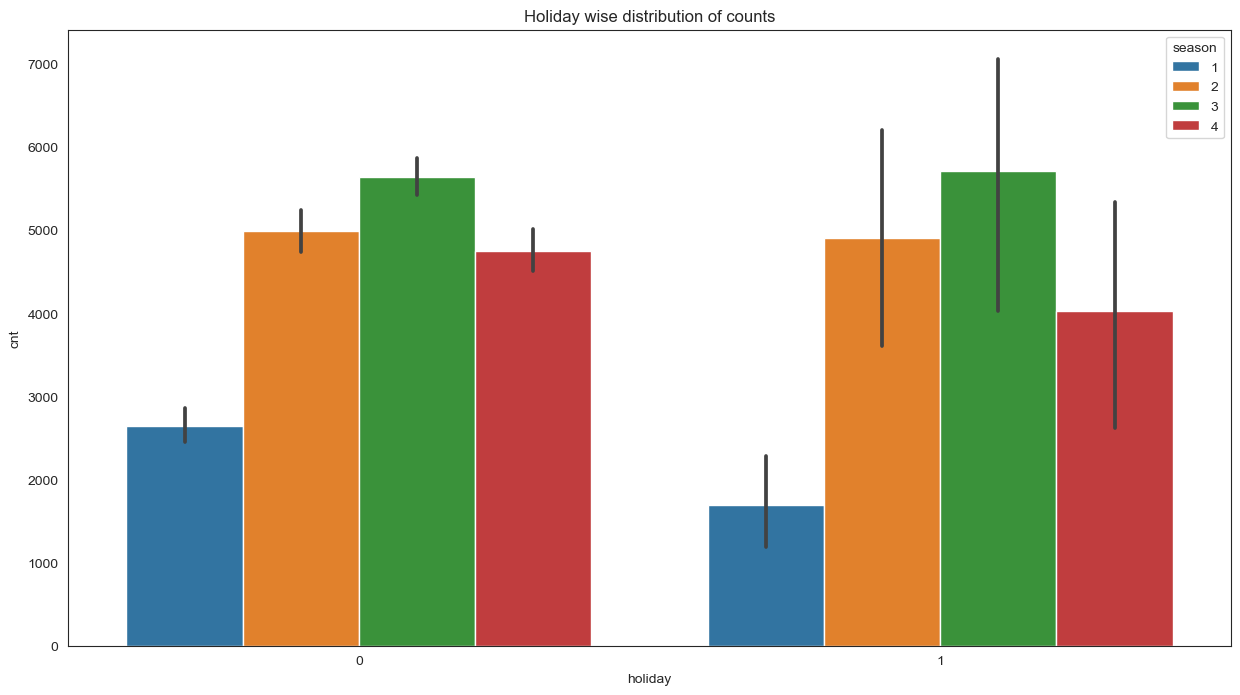

In [17]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='holiday',y='cnt',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

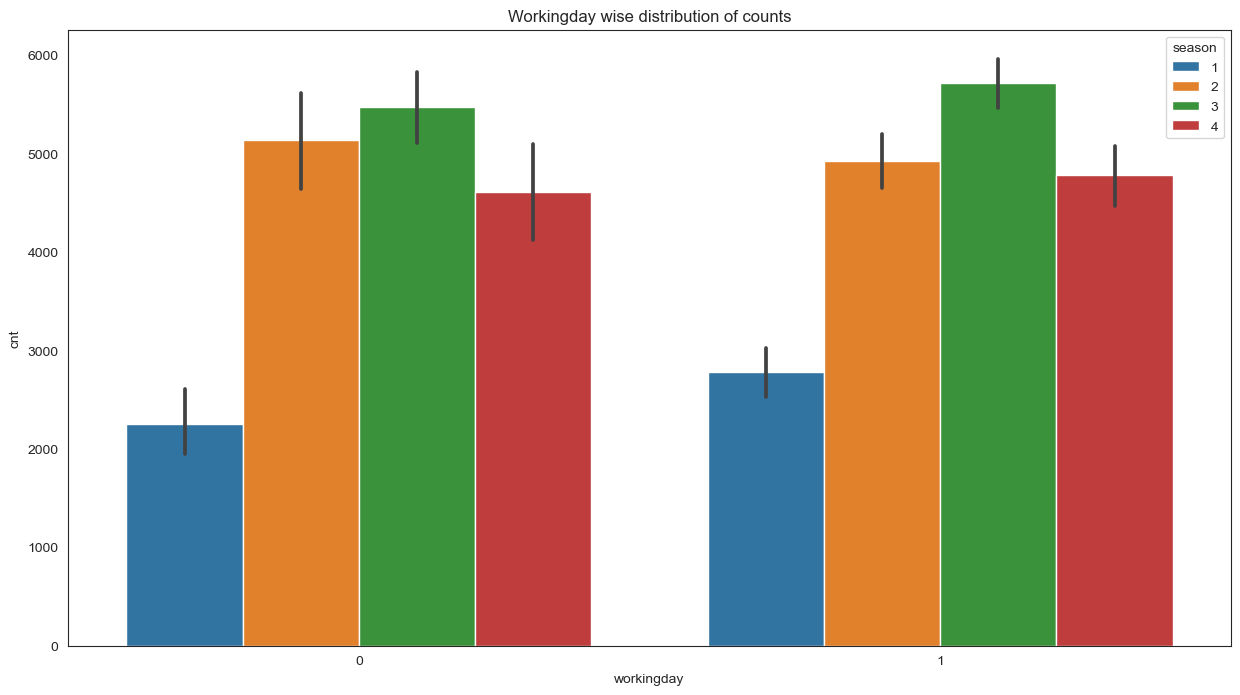

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='workingday',y='cnt',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.

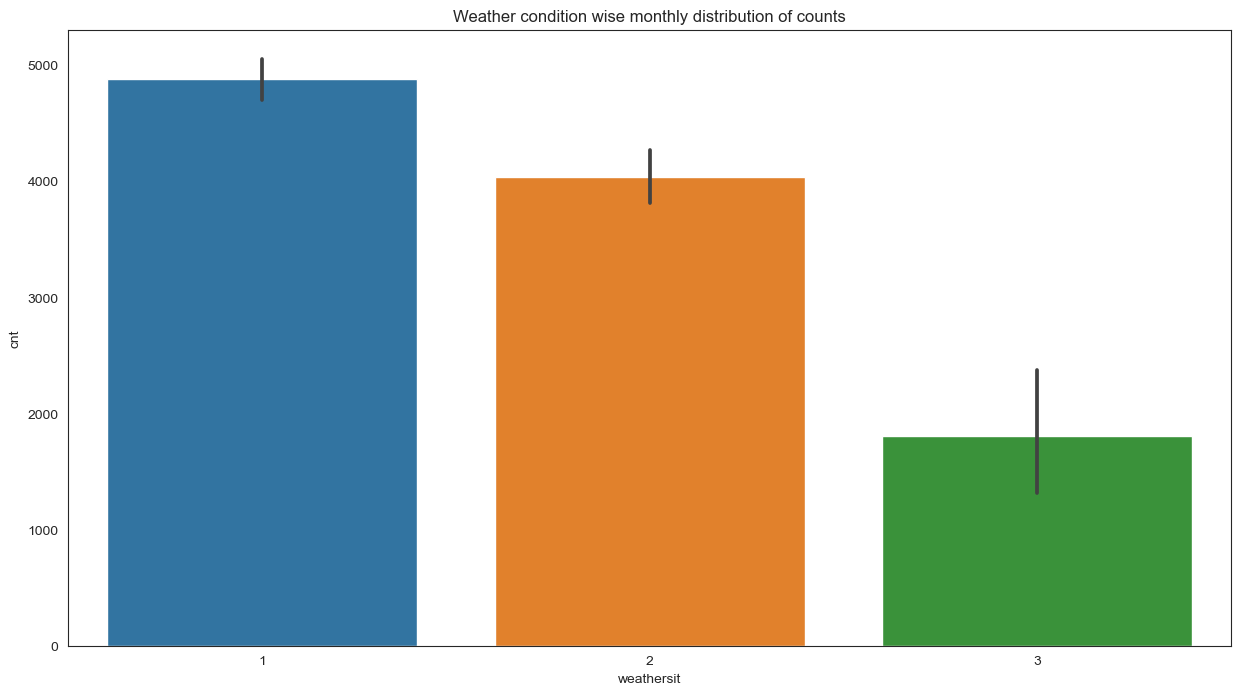

In [20]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weathersit',y='cnt',data=df[['mnth','cnt','weathersit']],ax=ax1)
ax1.set_title('Weather condition wise monthly distribution of counts')
plt.show()

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

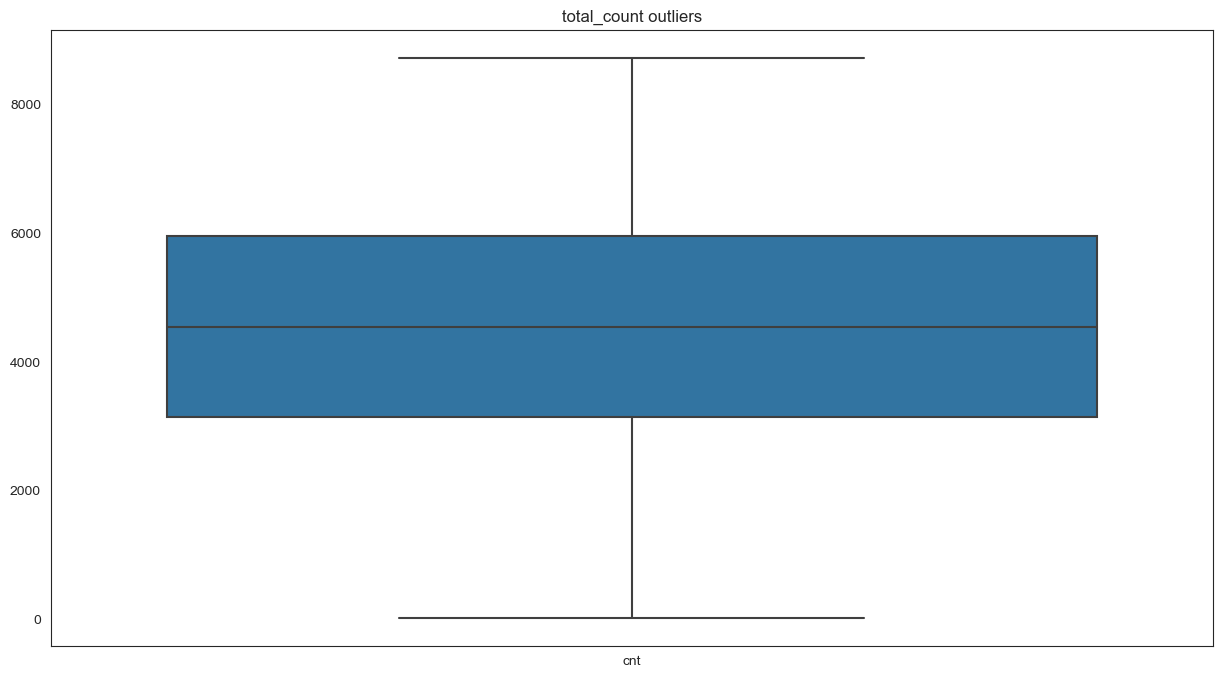

In [21]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['cnt']])
ax.set_title('total_count outliers')
plt.show()

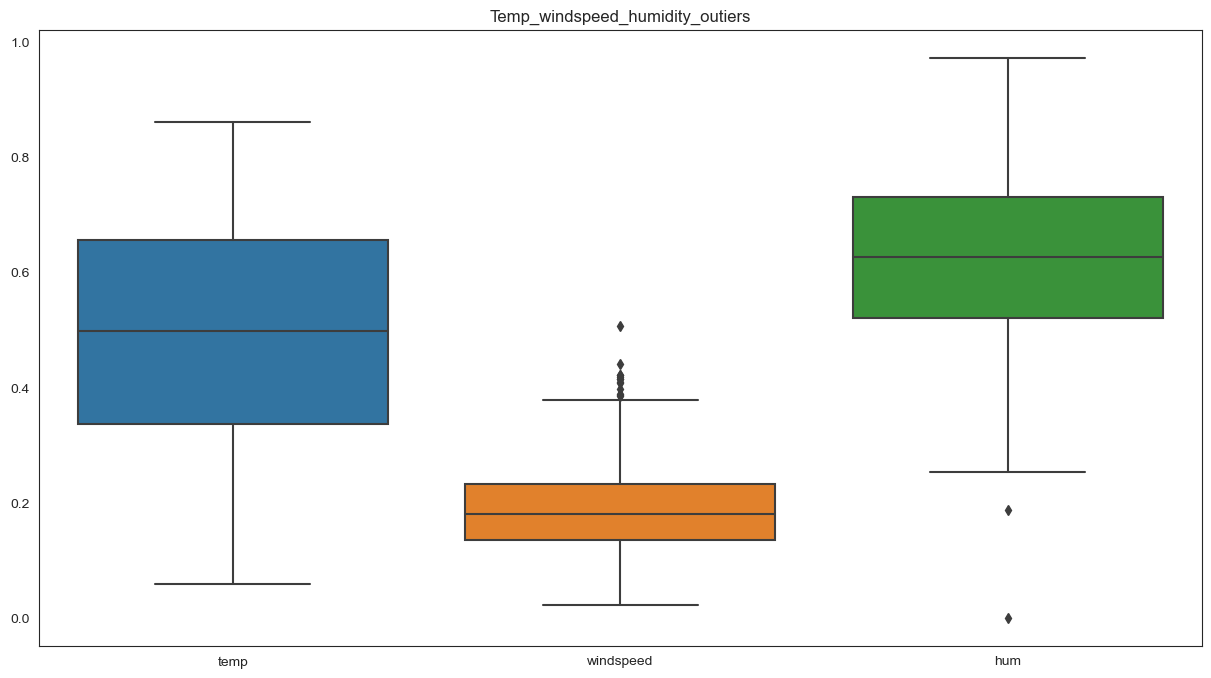

In [23]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp','windspeed','hum']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

## Replace and impute the outliers

In [9]:
wind_hum=pd.DataFrame(df,columns=['windspeed','hum'])
 #Cnames for outliers                     
cnames=['windspeed','hum']       
                      
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['hum']=wind_hum['hum'].fillna(wind_hum['hum'].mean())

In [10]:
#Replacing the imputated windspeed
df['windspeed']=df['windspeed'].replace(wind_hum['windspeed'])
#Replacing the imputated humidity
df['hum']=df['hum'].replace(wind_hum['hum'])
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Normal Probability Plot

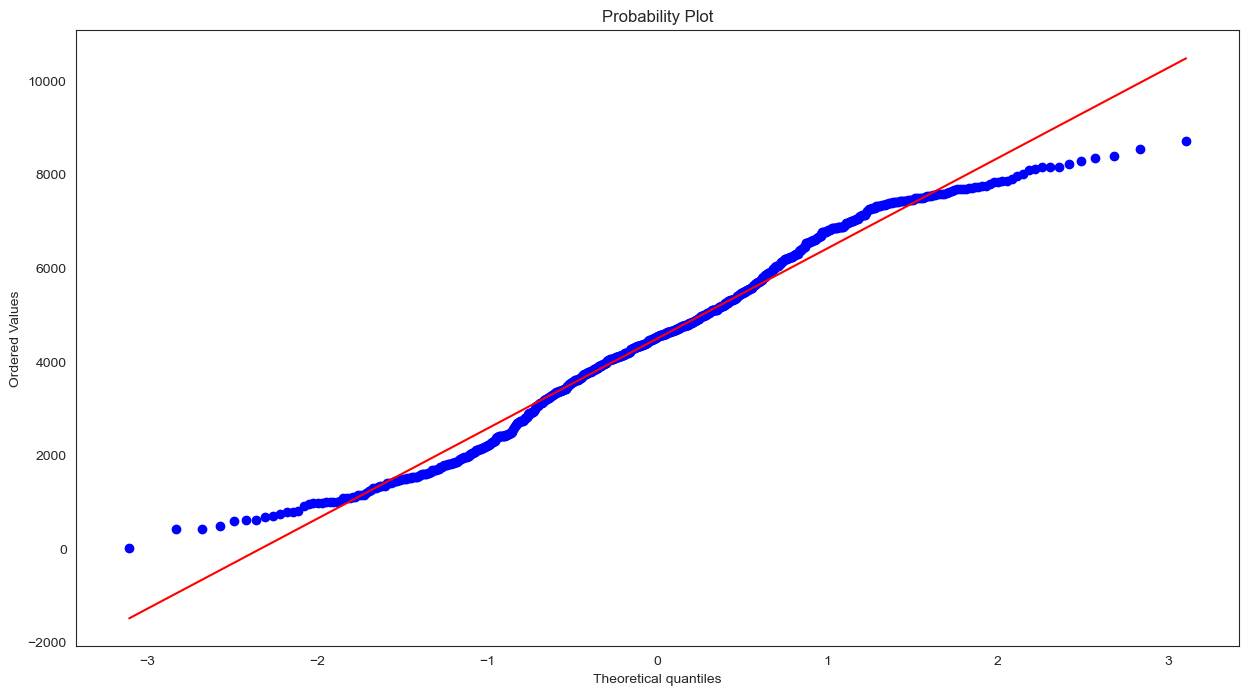

In [36]:
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(df.cnt.tolist(),dist='norm',plot=plt)
plt.show()

## Correlation matrix

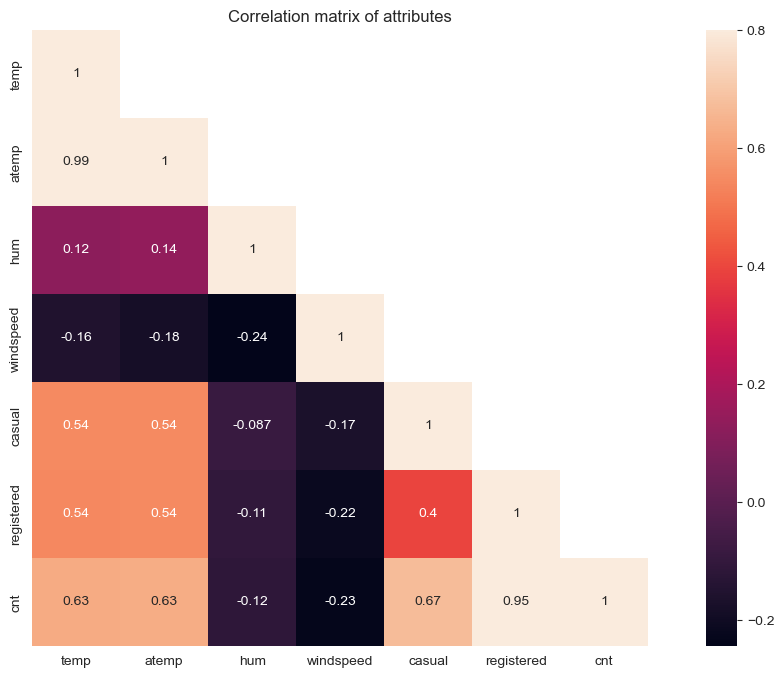

In [23]:
corr=df[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

# Divide data into features and target

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-3],df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(511, 14) (220, 14) (511, 2) (220, 2)


In [12]:
print(X_train.head())
print(y_train.head())

   index  instant     dteday season yr mnth holiday weekday workingday  \
0    223      224 2011-08-12      3  0    8       0       5          1   
1    684      685 2012-11-15      4  1   11       0       4          1   
2    685      686 2012-11-16      4  1   11       0       5          1   
3    163      164 2011-06-13      2  0    6       0       1          1   
4    394      395 2012-01-30      1  1    1       0       1          1   

  weathersit      temp     atemp       hum  windspeed  
0          1  0.708333  0.654042  0.415000   0.125621  
1          2  0.321667  0.324492  0.620417   0.152987  
2          1  0.345000  0.347204  0.524583   0.171025  
3          1  0.635000  0.601654  0.494583   0.305350  
4          1  0.269167  0.262625  0.400833   0.215792  
   index   cnt
0    223  4905
1    684  5445
2    685  5698
3    163  5020
4    394  3624


# Split features into categorical and numerical features

In [13]:
#Create a new dataset for train attributes
train_attributes=X_train[['season','mnth','yr','weekday','holiday','workingday','weathersit','hum','temp','windspeed']]
#Create a new dataset for test attributes
test_attributes=X_test[['season','mnth','yr','weekday','holiday','workingday','hum','temp','windspeed','weathersit']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weathersit','yr']
#numerical attributes
num_attributes=['temp','windspeed','hum','month','weekday']

# Decoding the training & testing attributes

In [14]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1
0,8,5,0.415000,0.708333,0.125621,False,False,True,False,True,False,False,True,True,False,False,True,False
1,11,4,0.620417,0.321667,0.152987,False,False,False,True,True,False,False,True,False,True,False,False,True
2,11,5,0.524583,0.345000,0.171025,False,False,False,True,True,False,False,True,True,False,False,False,True
3,6,1,0.494583,0.635000,0.305350,False,True,False,False,True,False,False,True,True,False,False,True,False
4,1,1,0.400833,0.269167,0.215792,True,False,False,False,True,False,False,True,True,False,False,False,True


In [15]:
X_train=train_encoded_attributes
y_train=y_train.cnt.values

In [16]:
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (220, 18)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1
0,12,2,0.733750,0.475833,0.174129,False,False,False,True,True,False,False,True,True,False,False,False,True
1,2,4,0.437826,0.186957,0.277752,True,False,False,False,True,False,False,True,True,False,False,True,False
2,10,5,0.585833,0.330833,0.229479,False,False,False,True,True,False,False,True,False,True,False,True,False
3,4,0,0.676250,0.425833,0.172267,False,True,False,False,True,False,True,False,False,True,False,False,True
4,9,2,0.570000,0.550000,0.236321,False,False,False,True,True,False,False,True,True,False,False,False,True


In [17]:
X_test=test_encoded_attributes
y_test=y_test.cnt.values

# Linear Regression

In [52]:
#training model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression()

In [53]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [63]:
lr=lr_model.score(X_train,y_train)
print(f'Accuracy of the model : {lr:.2f}')

Accuracy of the model : 0.82


In [65]:
predict=cross_val_predict(lr_model,X_train,y_train,cv=3)

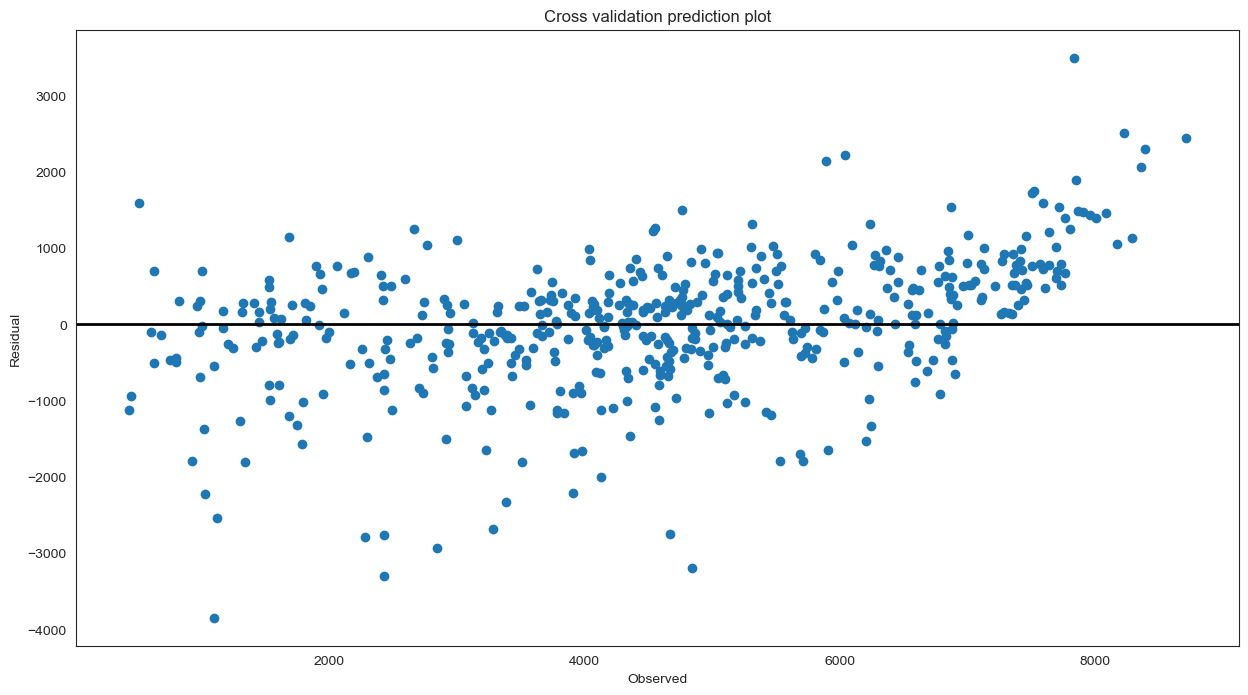

In [66]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.

In [72]:
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print(f'R-squared scores cross validation: {np.average(r2_scores):.2f}')

R-squared scores cross validation: 0.80


In [78]:
y_pred = lr_model.predict(X_test)

## Test Performance

In [81]:
r2 =  "{:.2f}".format(r2_score(y_test, y_pred))
mse =  "{:.2f}".format(mean_squared_error(y_test, y_pred))
rmse = "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred)))
mae =  "{:.2f}".format(mean_absolute_error(y_test, y_pred))

print('Linear Regressor \n')
print(f"Coefficient of Determination: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absoluter Error: {mae}")

Linear Regressor 

Coefficient of Determination: 0.85
Mean Squared Error: 613185.62
Root Mean Squared Error: 783.06
Mean Absoluter Error: 594.74


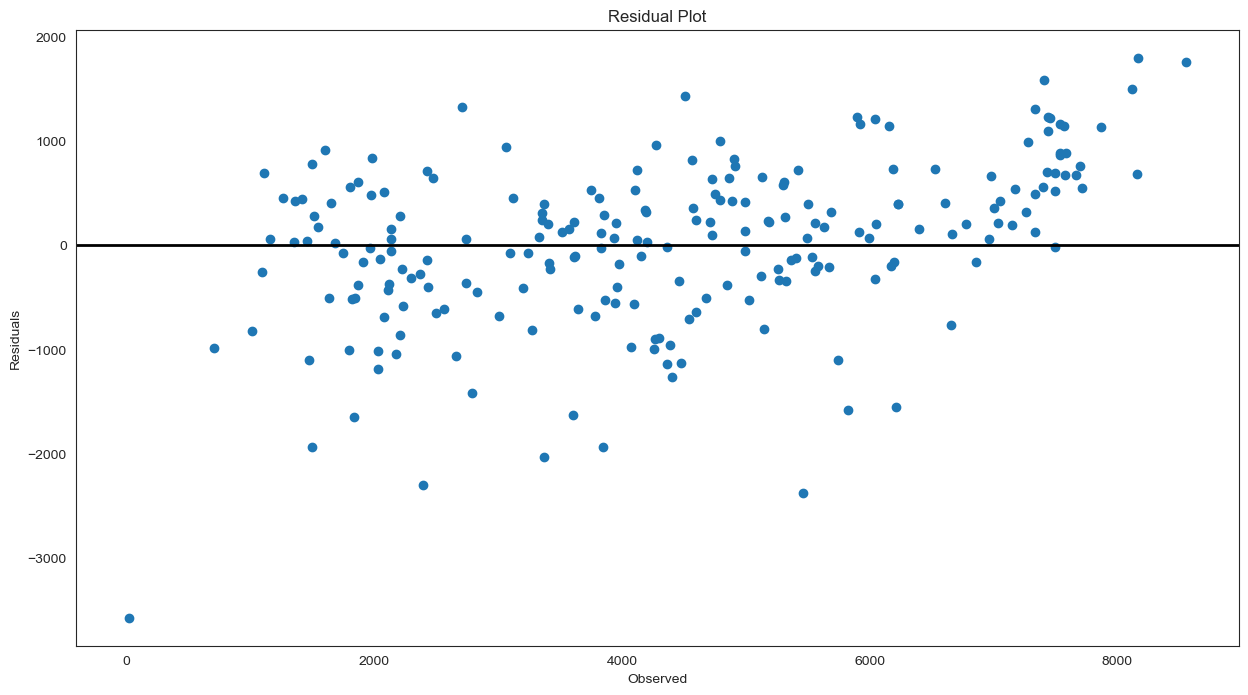

In [82]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-y_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

# Polynomial Regressor

In [104]:
degree = 2

poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [105]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [106]:
y_pred_poly = poly_model.predict(X_test_poly)

## Test Performance

In [107]:
r2_poly = "{:.2f}".format(r2_score(y_test, y_pred_poly))
mse_poly = "{:.2f}".format(mean_squared_error(y_test, y_pred_poly))
mae_poly = "{:.2f}".format(mean_absolute_error(y_test, y_pred_poly))

print(f'Polynomial Regressor - Degree {degree}\n')
print(f'Coefficient of Determination: {r2_poly}')
print(f'Mean Squared Error: {mse_poly}')
print(f'Mean Absolute Error: {mae_poly}')

Polynomial Regressor - Degree 2

Coefficient of Determination: 0.87
Mean Squared Error: 509935.48
Mean Absolute Error: 503.55


# Random Forest Regressor

In [108]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [109]:
y_pred_rf = rf_model.predict(X_test)

## Test Performance

In [110]:
r2_rf = "{:.2f}".format(r2_score(y_test, y_pred_rf))
mse_rf = "{:.2f}".format(mean_squared_error(y_test, y_pred_rf))
mae_rf =  "{:.2f}".format(mean_absolute_error(y_test, y_pred_rf))

print('Random Forest Regressor \n')
print(f'Coefficient of Determination: {r2_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')

Random Forest Regressor 

Coefficient of Determination: 0.89
Mean Squared Error: 419968.83
Mean Absolute Error: 424.26


# Support Vector Regression

In [111]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [112]:
y_pred_svr = svr_model.predict(X_test)

## Test Performance

In [113]:
r2_svr = "{:.2f}".format(r2_score(y_test, y_pred_svr))
mse_svr = "{:.2f}".format(mean_squared_error(y_test, y_pred_svr))
mae_svr = "{:.2f}".format(mean_absolute_error(y_test, y_pred_svr))

print('Support Vector Regression \n')
print(f'Coefficient of Determination: {r2_svr}')
print(f'Mean Squared Error: {mse_svr}')
print(f'Mean Absolute Error: {mae_svr}')

Support Vector Regression 

Coefficient of Determination: 0.16
Mean Squared Error: 3345592.65
Mean Absolute Error: 1527.25


# Best Model

1. Best coefficient of determination (R-Squared):
   - **Random Forest Regressor: 0.89**
   - Polynomial Regressor: 0.87
   - Linear Regression: 0.85
   - SVR: 0.16
2. Smallest MSE value:
   - **Random Forest Regressor: 419,968.83**
   - Polynomial Regressor: 509,935.48
   - Linear Regression: 613,185.62
   - SVR: 3,345,492.65
3. Smallest MAE value:
   - **Random Forest Regressor: 424.26**
   - Polynomial Regressor: 503.55
   - Linear Regression: 594.74
   - SVR: 1527.25

In [114]:
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

In [24]:
X_test.head()

,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1
0,12,2,0.733750,0.475833,0.174129,False,False,False,True,True,False,False,True,True,False,False,False,True
1,2,4,0.437826,0.186957,0.277752,True,False,False,False,True,False,False,True,True,False,False,True,False
2,10,5,0.585833,0.330833,0.229479,False,False,False,True,True,False,False,True,False,True,False,True,False
3,4,0,0.676250,0.425833,0.172267,False,True,False,False,True,False,True,False,False,True,False,False,True
4,9,2,0.570000,0.550000,0.236321,False,False,False,True,True,False,False,True,True,False,False,False,True


In [25]:
y_test[:5]

array([6606, 1550, 3747, 6041, 7538])

In [26]:
import tkinter as tk
from tkinter import messagebox
import pickle
import numpy as np

# Load the best model using pickle
with open('rf_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

# Function to make predictions
def predict():
    try:
        season_1 = False
        season_2 = False
        season_3 = False
        season_4 = False

        holiday_0 = False
        holiday_1 = False

        workingday_0 = False
        workingday_1 = False

        weather_condition_1 = False
        weather_condition_2 = False
        weather_condition_3 = False

        year_0 = False
        year_1 = False

        # Get input values from the entry widget
        month = int(entry_month.get())
        weekday = int(entry_weekday.get())
        humidity = float(entry_humidity.get())
        temp = float(entry_temp.get())
        windspeed = float(entry_windspeed.get())
        # Categorical
        season = int(entry_season.get()) # 1, 2, 3, 4
        holiday = int(entry_holiday.get()) # 0, 1
        workingday = int(entry_workingday.get()) # 0, 1
        weather_condition = int(entry_weather_condition.get()) # 1, 2, 3
        year = int(entry_year.get()) # 0, 1
        

        if season == 1:
            season_1 = True
        elif season == 2:
            season_2 = True
        elif season == 3:
            season_3 = True
        elif season == 4:
            season_4 = True

        if holiday == 0:
            holiday_0 = True
        elif holiday == 1:
            holiday_1 = True

        if workingday == 0:
            workingday_0 = True
        elif workingday == 1:
            workingday_1 = True

        if weather_condition == 1:
            weather_condition_1 = True
        elif weather_condition == 2:
            weather_condition_2 = True
        elif weather_condition == 3:
            weather_condition_3 = True

        if year == 0:
            year_0 = True
        elif year == 1:
            year_1 = True

        # Make a prediction using the loaded model
        input_data = np.array([[month, weekday, humidity, temp, 
                                windspeed, season_1, season_2, 
                                season_3, season_4, holiday_0,
                                holiday_1, workingday_0, workingday_1,
                                weather_condition_1, weather_condition_2, 
                                weather_condition_3, year_0, year_1]])
        prediction = best_model.predict(input_data)
        # Display the prediction
        messagebox.showinfo('Prediction Result', f'The predicted number of rented bicycle is: {int(prediction[0])}')
        # messagebox.showinfo('Prediction Result', f'SUCCESS')

    except ValueError:
        messagebox.showerror('Error', 'Invalid input. Please enter numeric values.')

# GUI setup
app = tk.Tk()
app.title('Bicycle Rent Predictor')

# Entry widgets for user input
labels = ['Humidity', 'Temp', 'Windspeed', 'Year', 'Month', 'Weekday', 'Season', 'Holiday', 'Workingday', 'Weather Condition']
extra_labels = ['Month', 'Weekday', 'Season', 'Holiday', 'Workingday', 'Weather Condition', 'Year']

extra_labels_dict = {
    'Month': '1 - 12, where it represents the month in numerical',
    'Weekday': '0: Sun; 1: Mon; 2: Tue; 3: Wed; 4: Thu; 5: Fri; 6: Sat',
    'Season': '1: Winter; 2: Spring; 3: Summer; 4: Fall',
    'Holiday': '0: Non holiday; 1: Holiday',
    'Workingday': '0: Non workday; 1: Workday',
    'Weather Condition': '1: Clear; 2: Mist + Cloudy; 3: Light snow/rain; 4: Heavy rain/thunderstorm',
    'Year': '0: 2011; 1: 2012'
}

entries = []

for i, label_text in enumerate(labels):
    label = tk.Label(app, text=label_text + ':')
    label.grid(row=i, column=0)
    entry = tk.Entry(app)
    entry.grid(row=i, column=1)
    entries.append(entry)
    if label_text in extra_labels:
        label = tk.Label(app, text=extra_labels_dict[label_text])
        label.grid(row=i, column=2)
    

# Assigning entry widgets to variables
(entry_humidity, entry_temp, entry_windspeed, entry_year, 
 entry_month, entry_weekday, entry_season, entry_holiday,
 entry_workingday, entry_weather_condition) = entries

# Button to trigger prediction
predict_button = tk.Button(app, text='Predict', command=predict)
predict_button.grid(row=len(labels), column=0, columnspan=2)

# Run the application
app.mainloop()

/Users/steven/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
